In [47]:
import numpy as np
import pandas as pd

df = pd.read_excel('tmiRNA.xlsx')

print(df['hsa-let-7a-1'][152])
print(type(df['hsa-let-7a-1'][152]))            

df = df.drop(labels=['Sample_ID'], axis=1)

12.36395709
<class 'numpy.float64'>


[[10.71   6.867  5.205 ...  5.817  8.708 13.76 ]
 [ 9.118  5.115  9.768 ...  5.115  9.486 12.658]
 [ 9.615  4.885  5.284 ...  5.415  8.889 13.296]
 ...
 [ 9.84   5.592 13.27  ...  5.647 10.288 13.505]
 [ 9.384  5.982  3.489 ...  5.384  8.558 13.351]
 [ 9.22   5.433  7.497 ...  5.357  7.175 14.677]]

[[10.71   6.867  5.205 ...  5.817  8.708 13.76 ]
 [ 9.118  5.115  9.768 ...  5.115  9.486 12.658]
 [ 9.615  4.885  5.284 ...  5.415  8.889 13.296]
 ...
 [ 9.84   5.592 13.27  ...  5.647 10.288 13.505]
 [ 9.384  5.982  3.489 ...  5.384  8.558 13.351]
 [ 9.22   5.433  7.497 ...  5.357  7.175 14.677]]


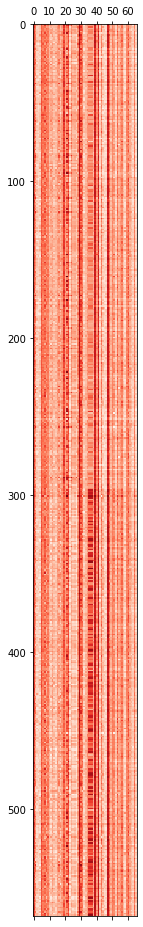

In [55]:
from sklearn import cluster
import matplotlib.pyplot as plt

df = df.fillna(value= 0.0)

test_arr = np.array(df)

test_arr = test_arr.astype(np.float64)

test_arr = np.round(test_arr, decimals=3)

test_arr = np.where(test_arr == np.inf, 0, test_arr)
test_arr = np.where(test_arr == - np.inf, 0, test_arr)

test_arr = np.delete(test_arr, np.where(test_arr == 0), axis=1)

print(test_arr)

print('')

print(test_arr)

model = cluster.SpectralCoclustering(n_clusters=2)
model.fit(test_arr)
fit_arr = test_arr[np.argsort(model.row_labels_)]
fit_arr = fit_arr[:, np.argsort(model.column_labels_)]

plt.matshow(fit_arr, cmap=plt.cm.Reds)